<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-10/blob/main/TrabajoIAEdades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este cuaderno clasificaremos las imágenes del Museo de La Rioja por épocas. Las épocas vienen definidas por el propio Museo, y van del 1 al 7 saltándose el 6.

Cada una de estas épocas corresponde a:
1. Prehistoria
2. Edad antigua
3. Edad Media
4. Edad Moderna
5. Edad Contemporánea
7. Otras cronologías

Como el 7 es una época indeterminada, y además tiene un número de fotos muy distinto al resto. Vamos a entrenar con respecto a las Edades bien determinadas (del 1 al 5)

# Importamos el dataset con las imagenes

In [1]:
!wget https://www.dropbox.com/s/8bderlaqfere52h/var.zip?dl=1 -O dataset

--2021-05-30 08:27:47--  https://www.dropbox.com/s/8bderlaqfere52h/var.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/8bderlaqfere52h/var.zip [following]
--2021-05-30 08:27:47--  https://www.dropbox.com/s/dl/8bderlaqfere52h/var.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd853b1ca5fb5f39023d87d0ac5.dl.dropboxusercontent.com/cd/0/get/BPfGuGc5kS1GXLF51tiRy5ppO_qUsaEK9ry2VXgAyYBN2b73yJVym2TzaFfThss-yyQ4_2R13em_2sWE3SzFbOaCQFRqkFFLuFcYPIqc-THSz7Z2Or8UIEVo_GcBuIOnTUQTklr4k_RKGCaihrcT_GZs/file?dl=1# [following]
--2021-05-30 08:27:47--  https://ucd853b1ca5fb5f39023d87d0ac5.dl.dropboxusercontent.com/cd/0/get/BPfGuGc5kS1GXLF51tiRy5ppO_qUsaEK9ry2VXgAyYBN2b73yJVym2TzaFfThss-yyQ4_2R13em_2sWE3SzFbOaCQFRqkFFLuFcYPI

In [2]:
!unzip dataset

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/27949.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/28728.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30674.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30675.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30677.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30678.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30679.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30680.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30683.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30685.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/2/30687.jpg  
  inflating: var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N

In [3]:
import pandas as pd

# Importamos el excel con los descriptores

In [4]:
!wget https://www.dropbox.com/s/nk8u90azzz3rd0i/MuseoDeLaRioja.zip?dl=1 -O MuseoDeLaRioja

--2021-05-30 08:28:34--  https://www.dropbox.com/s/nk8u90azzz3rd0i/MuseoDeLaRioja.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/nk8u90azzz3rd0i/MuseoDeLaRioja.zip [following]
--2021-05-30 08:28:35--  https://www.dropbox.com/s/dl/nk8u90azzz3rd0i/MuseoDeLaRioja.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1a5f773e5e0ad7e99005cf863c.dl.dropboxusercontent.com/cd/0/get/BPepChV668g1lzkkYnjb77KZs2fKcSn04sUF7cDl-25VmG6EaLKkVI-7x9Y7RVb1YECiWI6emYsyg5FpLaAmOEo79TEqYRHvxux4gJB5wtFSVPPKxu2hVp_nrGC5iV5d8CGWHSkY8E_IKxUdBW3n-zCl/file?dl=1# [following]
--2021-05-30 08:28:35--  https://uc1a5f773e5e0ad7e99005cf863c.dl.dropboxusercontent.com/cd/0/get/BPepChV668g1lzkkYnjb77KZs2fKcSn04sUF7cDl-25VmG6EaLKkVI-7x9Y7RVb1YECiW

In [5]:
!unzip MuseoDeLaRioja

Archive:  MuseoDeLaRioja
  inflating: MuseoDeLaRioja.xlsx     


In [6]:
df = pd.read_excel('/content/MuseoDeLaRioja.xlsx', usecols=["EDAD","ID_NUM", "DATACION_INICIAL", "PRECISION_INICIAL", "DATACION_FINAL", "PRECISION_FINAL"])
df.head()

,ID_NUM,EDAD,DATACION_INICIAL,PRECISION_INICIAL,DATACION_FINAL,PRECISION_FINAL
0,4835,2.0,1.0,sdC,4.0,sdC
1,4836,NaN,1.0,sdC,4.0,sdC
2,4839,NaN,1.0,sdC,4.0,sdC
3,4840,NaN,1.0,sdC,4.0,sdC
4,4844,2.0,1.0,sdC,4.0,sdC


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_NUM             3182 non-null   int64  
 1   EDAD               2917 non-null   float64
 2   DATACION_INICIAL   3176 non-null   float64
 3   PRECISION_INICIAL  3165 non-null   object 
 4   DATACION_FINAL     3108 non-null   float64
 5   PRECISION_FINAL    2923 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB
None


In [8]:
!mkdir cleanedDataset

In [9]:
import os 
from google.colab import files
import shutil
import PIL

In [10]:
print(os.listdir('/content/var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080'))

['26', '22', '19', '18', '16', '27', '12', '15', '2', '17', '10', '8', '7', '3', '13', '21', '6', '11', '5', '23', '25', '1', '4', '14', '24', '9', '20']


Creamos una función cleanDataset que recorrerá todas las carpetas y juntará las imágenes en un solo directorio. Si existen imágenes con el mismo identificador, que ocurrirá cuando sean las mismas imágenes pero con distintos tamaños, nos quedaremos con las de mayor resolucion.

In [11]:
def cleanDataset(directorioOrigen, directorioDestino):
  contenido = os.listdir(directorioOrigen)
  for fichero in contenido:
    if (os.path.isdir(os.path.join(directorioOrigen,os.path.basename(fichero)))):
      cleanDataset(os.path.join(directorioOrigen,os.path.basename(fichero)), directorioDestino) 
    else :
      if (os.path.exists(directorioDestino + '/' + os.path.basename(fichero))):
        image1 = PIL.Image.open(directorioDestino + '/' + os.path.basename(fichero))
        image2 = PIL.Image.open(os.path.join(directorioOrigen,os.path.basename(fichero)))
        width1, height1 = image1.size
        width2, height2 = image2.size
        if (width1 < width2 and height1 < height2):
          os.remove(directorioDestino + '/' + os.path.basename(fichero))
          shutil.copyfile(os.path.join(directorioOrigen,os.path.basename(fichero)), directorioDestino + '/' + os.path.basename(fichero))
      else:
        shutil.copyfile(os.path.join(directorioOrigen,os.path.basename(fichero)), directorioDestino + '/' + os.path.basename(fichero))

In [12]:
!rm /content/var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080/11/8497.jpg

In [13]:
cleanDataset('/content/var/ftp/celerra/audiovisual/CMU_MUR/imagenes/N010080', '/content/cleanedDataset')

In [14]:
import math
def truncate(num, n):
    integer = int(num * (10**n))/(10**n)
    return float(integer)

# Recomposición de las imágenes en carpetas

In [15]:
!pip install fastai --upgrade

     |████████████████████████████████| 204kB 8.2MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [16]:
from fastai.vision.all import *
import os
from google.colab import files
from sklearn.model_selection import train_test_split
import shutil

In [17]:
path = Path('data/museo')

In [18]:
for im in verify_images(get_image_files('/content/cleanedDataset')):
    os.remove(str(im))


Creamos una función para según los distintos valores que hay en la columna Edad, creamos carpetas y movemos las imagenes pertinentes. Estos valores serán nuestras etiquetas

In [19]:
def moveImages(directorioOrigen):
  contenido = os.listdir(directorioOrigen)
  for fichero in contenido:
    if (bool(df.loc[df['ID_NUM'] == float(os.path.splitext(os.path.basename(fichero))[0])]['EDAD'].to_dict())): # Comprobamos que esta, porque hay imagenes que no estan en el DataFrame y viceversa
      dictionary = df[df['ID_NUM'] == float(os.path.splitext(os.path.basename(fichero))[0])]['EDAD'].to_dict()
      edad = float([x for x in dictionary.values()][0])
      if (not math.isnan(edad)):
        edad = str(int(edad))
        if (not os.path.exists('/content/'+ edad)):
          os.mkdir(edad)
        shutil.copyfile(os.path.join(directorioOrigen,os.path.basename(fichero)), '/content/'+ edad + '/' + os.path.basename(fichero))

In [20]:
moveImages('/content/cleanedDataset')

# División en conjunto de entrenamiento y test

In [21]:
(path/'train/1').mkdir(parents=True,exist_ok=True)
(path/'train/2').mkdir(parents=True,exist_ok=True)
(path/'train/3').mkdir(parents=True,exist_ok=True)
(path/'train/4').mkdir(parents=True,exist_ok=True)
(path/'train/5').mkdir(parents=True,exist_ok=True)

(path/'test/1').mkdir(parents=True,exist_ok=True)
(path/'test/2').mkdir(parents=True,exist_ok=True)
(path/'test/3').mkdir(parents=True,exist_ok=True)
(path/'test/4').mkdir(parents=True,exist_ok=True)
(path/'test/5').mkdir(parents=True,exist_ok=True)

Realizamos el train_test_split para tener nuestro conjunto de entrenamineto y de test de cada carpeta. El tamaños del conjunto de test que elegiremos es 0.25

In [22]:
trainUno, testUno = train_test_split(get_image_files('/content/1'),test_size=0.25,random_state=15)
trainDos, testDos = train_test_split(get_image_files('/content/2'),test_size=0.25,random_state=15)
trainTres, testTres = train_test_split(get_image_files('/content/3'),test_size=0.25,random_state=15)
trainCuatro, testCuatro = train_test_split(get_image_files('/content/4'),test_size=0.25,random_state=15)
trainCinco, testCinco = train_test_split(get_image_files('/content/5'),test_size=0.25,random_state=15)

In [23]:
for x in trainUno:
  shutil.move(str(x),path/('train/1/'+x.name))

for x in trainDos:
  shutil.move(str(x),path/('train/2/'+x.name))

for x in trainTres:
  shutil.move(str(x),path/('train/3/'+x.name))

for x in trainCuatro:
  shutil.move(str(x),path/('train/4/'+x.name))

for x in trainCinco:
  shutil.move(str(x),path/('train/5/'+x.name))

for x in testUno:
  shutil.move(str(x),path/('test/1/'+x.name))

for x in testDos:
  shutil.move(str(x),path/('test/2/'+x.name))

for x in testTres:
  shutil.move(str(x),path/('test/3/'+x.name))

for x in testCuatro:
  shutil.move(str(x),path/('test/4/'+x.name))

for x in testCinco:
  shutil.move(str(x),path/('test/5/'+x.name))

In [24]:
shutil.rmtree('/content/1')
shutil.rmtree('/content/2')
shutil.rmtree('/content/3')
shutil.rmtree('/content/4')
shutil.rmtree('/content/5')
shutil.rmtree('/content/cleanedDataset')
shutil.rmtree('/content/var')

Creamos el DataBlock que realizará un data augmentation para aumentar nuestra muestra de imagenes

In [25]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=aug_transforms(size=256,min_scale=0.75))

In [26]:
trainPath = Path('/content/data/museo/train')

In [27]:
trainPath.ls()

(#5) [Path('/content/data/museo/train/2'),Path('/content/data/museo/train/3'),Path('/content/data/museo/train/5'),Path('/content/data/museo/train/1'),Path('/content/data/museo/train/4')]

In [28]:
dls = db.dataloaders(trainPath,bs=128)

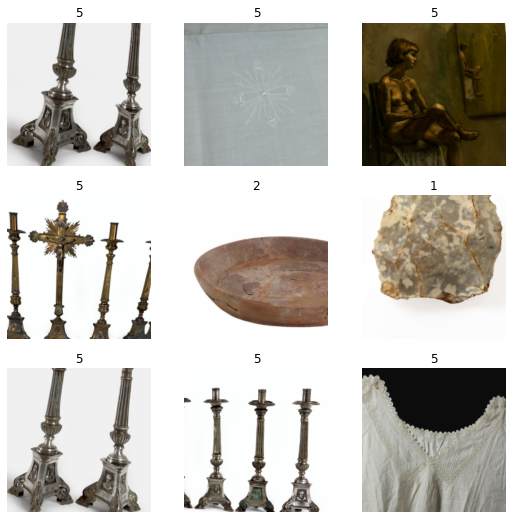

In [29]:
dls.show_batch()

# Creación del modelo


Creamos el modelo de Red neuronal convolucional con la arquitectura ResNet18

In [30]:
learn = cnn_learner(dls,resnet50,metrics=accuracy).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Entrenamos el modelo con 10 epocas

In [31]:
learn.fine_tune(10,base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.835176,1.933501,0.358491,00:31


epoch,train_loss,valid_loss,accuracy,time
0,2.907300,1.732783,0.377358,00:28
1,2.671525,1.614721,0.377358,00:26
2,2.442255,1.475567,0.396226,00:27
3,2.220260,1.375785,0.509434,00:26
4,2.018636,1.234587,0.528302,00:27
5,1.858869,1.094815,0.622642,00:26
6,1.694461,0.981509,0.622642,00:27
7,1.585978,0.915635,0.660377,00:27
8,1.473823,0.887481,0.660377,00:26
9,1.383218,0.868635,0.698113,00:26


In [44]:
learn.export('edades.pkl')

In [45]:
interp = ClassificationInterpretation.from_learner(learn)

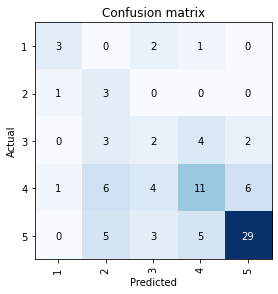

In [46]:
interp.plot_confusion_matrix()


Visualizamos la matriz de confusión, vemos como hay imagenes que se confunden, sobre todo con la edad 4 y 5


Creamos un DataBlock para el test

In [47]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=64)

In [48]:
learn.dls = dlsTest

In [49]:
learn.validate()

(#2) [1.242871642112732,0.5274725556373596]

Ha mejorado con respecto a la clasificación en siglos. Pero no lo suficiente como para considerarlo un buen modelo. Ni siquiera decente.

Creemos que esto es así puesto que hay pocas imágenes en el dataset. Con las funciones que creamos, nos quedamos sólo con las imágenes del dataset que tienen foto y que tienen una fila en el Excel, es decir, descartamos las fotos sin filas en excel (obviamente, porque no sabemos sus características y no tenemos los conocimientos para clasificar) y las filas del Excel sin fotos (claro, no podemos entrenar el modelo).

# Creación de una aplicación para aplicar el modelo

In [50]:
learn_inf = load_learner('edades.pkl')

In [51]:
pip install viola

In [40]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [52]:
btn_upload=widgets.FileUpload()
out_pl=widgets.Output()
lbl_pred=widgets.Label()

In [53]:
#Interfaz
def on_data_change(change):
  lbl_pred.value= ' '

  img=PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl:
    display(img.to_thumb(224,244))
  pred, pred_idx, probs=learn_inf.predict(img)
  resultado=""
  if pred=='1':
    resultado='Prehistoria'
  elif pred=='2':
    resultado='Edad Antigua'
  elif pred=='3':
    resultado='Edad Media'
  elif pred=='4':
    resultado='Edad Moderna'
  elif pred=='5':
    resultado='Edad Contemporánea'
  lbl_pred.value= f'Edad de la obra:  {resultado} ; Probabilidad: {probs[pred_idx]: .04f}'

In [54]:
btn_upload.observe(on_data_change, names=['data'])

display(VBox([widgets.Label('Elige una imagen de una obra'), btn_upload, out_pl, lbl_pred]))

# Vamos a probar aumentando el tamaño del conjunto de test
Ya que, por ejemplo, para la 2ª edad, tenemos una única imagen. Este proceso lo realizaremos en el cuaderno TrabajoTimmyElNiño